In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math
%matplotlib inline

data = pd.read_csv('data_banknote_authentication.txt',header=1)
data.columns=['Variance','Skewness','Kurtosis','Entropy','Classification']
#Randomize the dataset to avoid a bias in the model
data = data.sample(frac=1).reset_index(drop=True)

# The Banknote Authentication Dataset

There are 1372 items (images of banknotes — think Euro or dollar bill). There are 4 predictor variables (variance of image, skewness, kurtosis, entropy). The variable to predict is encoded as 0 (authentic) or 1 (forgery). See

In [2]:
X = data.iloc[:,0:4]
y = data.iloc[:, 4]
data.head()

,Variance,Skewness,Kurtosis,Entropy,Classification
0,-6.50840,8.76960,0.23191,-3.937000,1
1,-1.23900,-6.54100,4.81510,-0.033204,1
2,3.42460,-0.14693,0.80342,0.291360,0
3,0.86736,5.56430,1.67650,-0.167690,0
4,-1.77810,0.85460,7.13030,0.027572,0


# Principal Component Analysis

Since our dataset is currently in 4 Dimensions, it is hard to visualize and we may be able to get a better insight into our data if we can visualize it

In [75]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
reducedX = pca.fit_transform(X)

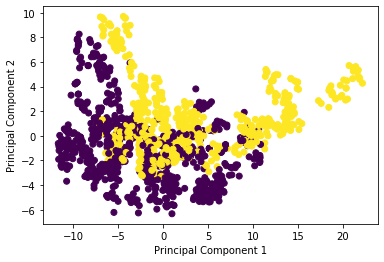

In [76]:
plt.scatter(reducedX[:,0],reducedX[:,1],c=y)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

Although there is some seperation in the data, we see a lot of overlapping points which tell us that PCA with 2 components will not yield a good dataset to work with for this problem

# Feature Scaling

Although we will not be applying PCA to our data, we will be using feature scaling on our data

In [3]:
from sklearn import preprocessing
mms = preprocessing.MinMaxScaler()
XScaled = mms.fit_transform(X)
XScaled

array([[0.03848733, 0.84351555, 0.23770694, 0.41928767],
       [0.41848575, 0.27061482, 0.43514334, 0.77425243],
       [0.7547974 , 0.50987177, 0.26232666, 0.80376442],
       ...,
       [0.40737295, 0.57398212, 0.55245008, 0.84856197],
       [0.52241381, 0.58714597, 0.08629892, 0.72110714],
       [0.27091131, 0.66643592, 0.208178  , 0.61152786]])

Our predictor variables are now all within the range of [0,1]

# Create training and testing data

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(XScaled, y, test_size=0.2, random_state=15)

# Creating our Logistic Regression Model

In [6]:
from sklearn.linear_model import LogisticRegression
logRegModel = LogisticRegression(random_state=0).fit(X_train, y_train)

/anaconda3/envs/tensorflowSessions/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [7]:
yPred = logRegModel.predict(X_test)


In [24]:
correct = 0
false = 0
for v in range(len(yPred)):
    if yPred[v] == yTest[v]:
        correct += 1
    else:
        false += 1

acc1 = correct/(correct+false)
print("Accuracy: " + str(acc1))

Accuracy: 0.9598540145985401


# For comparison, lets run this on the non-feature scaled data

In [22]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X, y, test_size=0.2, random_state=15)
logRegModel2 = LogisticRegression(random_state=0).fit(X_train2, y_train2)
yPred2 = logRegModel.predict(X_test2)

/anaconda3/envs/tensorflowSessions/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [25]:
correct2 = 0
false2 = 0
for v in range(len(yPred2)):
    if yPred2[v] == yTest[v]:
        correct2 += 1
    else:
        false2 += 1

acc2 = correct2/(correct2+false2)
print("Accuracy: " + str(acc2))

Accuracy: 0.9562043795620438


In [26]:
print("Difference: " + str(acc1-acc2))

Difference: 0.0036496350364962904


# In this case, there is not much difference between accuracies because all of our data is around the same range of values (about -10 to 10)

Feature Scaling would only be necessary if we have arbitrarily large values for a predictor